# Part I - Ford GoBike System Data Exploration
## by Shannon

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Loading in the data
df = pd.read_csv('fordgobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#Number of rows and columns in the dataset.
df.shape

(183412, 16)

### What is the structure of your dataset?

> In this dataset, there are 16 columns and 183,412 rows.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in the dataset are duration, stations, and user type. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Looking at how long trips take on average, stations names to see which ones are most popular, and seeing which type of user (Customer or Subscriber) mostly use the product.

# Data Wrangling

Dropping irrelevant columns

In [4]:
#Making a copy of the original dataset
new_df = df.copy()

In [5]:
#Dropping all rows with null values
Dropped_Columns = ['start_station_id', 'start_station_latitude', 'start_station_longitude','end_station_latitude', 'end_station_longitude', 'end_station_id']
new_df = new_df.drop(Dropped_Columns, axis = 1)

In [6]:
#Checking to see if the columns were dropped
new_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'bike_id', 'user_type', 'member_birth_year',
       'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

Dropping all NA values

In [7]:
#Checking to see the number of null values in each column
new_df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_name          197
end_station_name            197
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#Dropping rows with null values in the dataset
new_df = new_df.dropna()

In [9]:
#Testing to see if there are no null values in each column
new_df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

Changing column datatypes

In [10]:
#Checking the column datatypes
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_name         174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 14.7+ MB


In [11]:
#Changing the member_birth_year column datatype to an integer from a float
new_df['member_birth_year'] = new_df['member_birth_year'].astype(int)

In [12]:
#Checking to see if the member_birt_year column datatype changed to an integer
new_df['member_birth_year'].dtypes

dtype('int64')

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [13]:
new_df['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### What do the distributions look like for duration and member birth year?

''

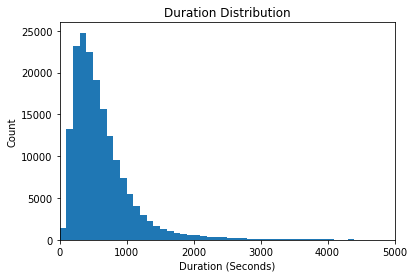

In [14]:
#Histogram for duration sec
bins = np.arange(0, new_df['duration_sec'].max(), 100)
plt.hist(data = new_df, x = 'duration_sec', bins = bins)
plt.title('Duration Distribution')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Count')
plt.xlim(0,5000) #Added an limit on the x axis to the original histogram
;

''

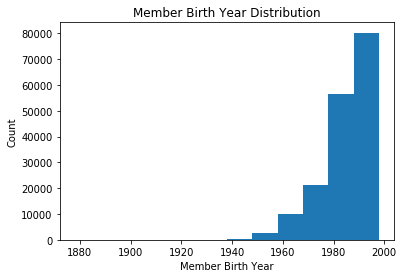

In [15]:
#Histogram for member birth year
bins = np.arange(new_df['member_birth_year'].min(), new_df['member_birth_year'].max(), 10)
plt.hist(data = new_df, x = 'member_birth_year', bins = bins)
plt.title('Member Birth Year Distribution')
plt.xlabel('Member Birth Year')
plt.ylabel('Count')
;

In [16]:
new_df['member_birth_year'].min()

1878

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> My first duration distribution visualization was skewed to the right. To make sure all of the data was seen, I had to change the x axis limits due to the number of outliers. Now we can see that the duratiopn of people riding bikes were mostly used around 500 seconds.

>The second distribution, Member Birth Year Distribution, was skewed to the left. This shows that many people born between 1990 and 2000 were using these bikes. No transformations were done.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some data wrangling that had to be done before making visualizations included dropping columns, dropping rows with null values, and changing the datatype of the member_birth_year column.

> Something that I did notice was unsual was that the min birth year of a member was 1878. That would mean this person is over 100 years old and decided to rent bike.

### Which stations are the most popular for taking and returning bikes?

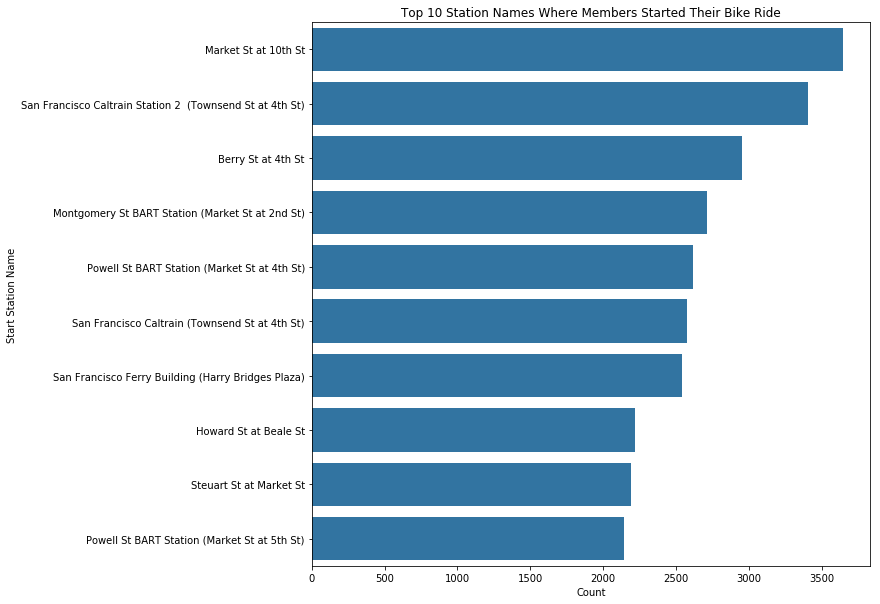

In [17]:
#Top 10 Station Names Where Members Started Their Bike Ride
plt.figure(figsize = [10,10])
order = new_df['start_station_name'].value_counts()[:10].index
base_color = sb.color_palette()[0]
sb.countplot(data = new_df, y = 'start_station_name', color = base_color, order = order)
plt.title('Top 10 Station Names Where Members Started Their Bike Ride')
plt.ylabel('Start Station Name')
plt.xlabel('Count');

Looking at the above bar graph, we can see that the bike station on Market St at 10th St is the most popular starting station for members.

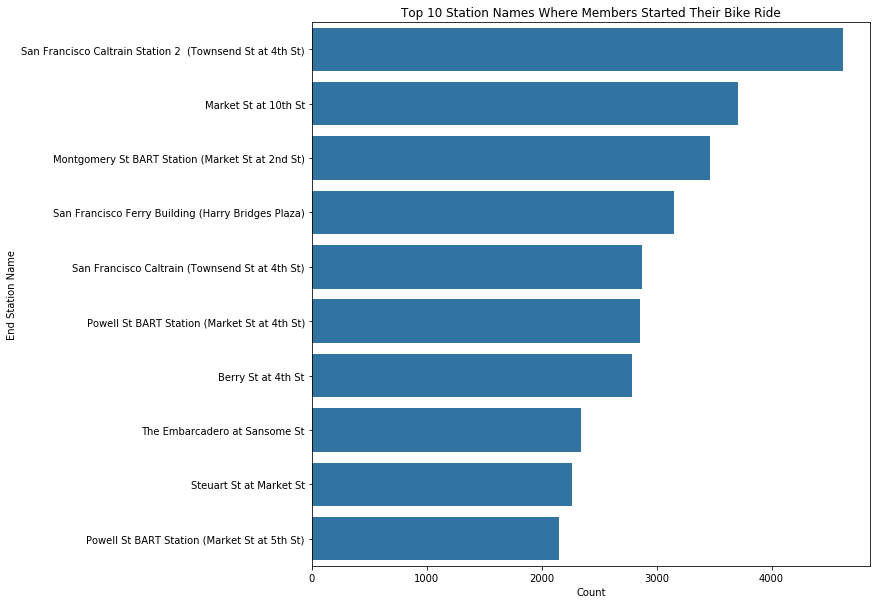

In [18]:
#Top 10 Station Names Where Members Ended Their Bike Ride
plt.figure(figsize = [10,10])
order = new_df['end_station_name'].value_counts()[:10].index
base_color = sb.color_palette()[0]
sb.countplot(data = new_df, y = 'end_station_name', color = base_color, order = order)
plt.title('Top 10 Station Names Where Members Ended Their Bike Ride')
plt.ylabel('End Station Name')
plt.xlabel('Count');

Looking at the above bar graph, we can see that the bike station at San Francisco Caltrain Station 2 (Townsend St as 4th St) is the most popular station for mebers to end their bike ride.

### Which gender and user type rents more bikes?

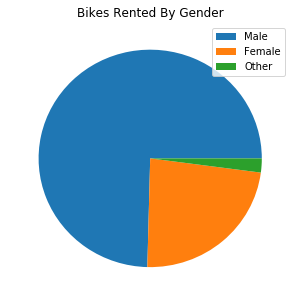

In [19]:
plt.figure(figsize = [5,5])

#Gender Pie Chart
gender = new_df['member_gender'].value_counts()
plt.pie(gender)
plt.title('Bikes Rented By Gender')
plt.legend(gender.index);

The pie chart above shows that about 75% males, 20% female, and 5% other are gender percentages for all bikes rented from the Ford GoBike System.

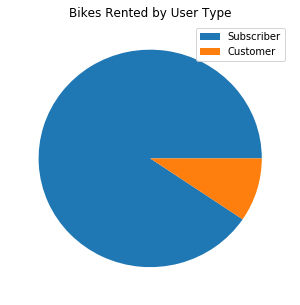

In [20]:
plt.figure(figsize = [5,5])

#User Type Pie Chart
user_type = new_df['user_type'].value_counts()
plt.pie(user_type)
plt.title('Bikes Rented by User Type')
plt.legend(user_type.index);

This second pie chart shows that the majority of the bike rented from the Ford GoBike System are from their subscribers.

### Were the bikes shared for all of the trip?

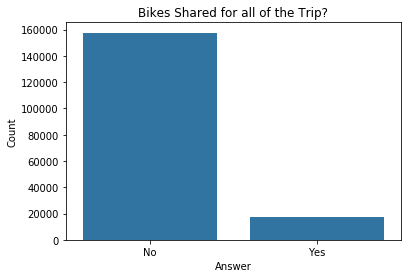

In [21]:
#Bar plot
base_color = sb.color_palette()[0]
sb.countplot(data = new_df, x = 'bike_share_for_all_trip', color = base_color)
plt.title('Bikes Shared for all of the Trip?')
plt.ylabel('Count')
plt.xlabel('Answer');

The above bar graph shows that most of the bikes that were rented were not shared for all of the trip.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### What is the relationship between member birth year and age?

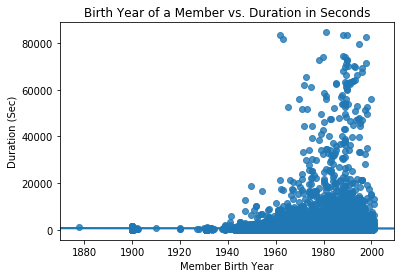

In [22]:
#Scatter Plot with title and axis names
sb.regplot(data = new_df, x = 'member_birth_year', y = 'duration_sec', truncate=False, x_jitter=0.3)
plt.title('Birth Year of a Member vs. Duration in Seconds')
plt.xlabel('Member Birth Year')
plt.ylabel('Duration (Sec)');

I am guessing that the younger you are, the longer one may rent a bike. So, that I was wanting to investigate this theory with a scatterplot. 

This scatterplot shows that there is no correlation between duration and member birth year. This could mean that people are only renting bikes to get to where thy need to go at any age.

### What the difference is the median birth year by gender from the members?

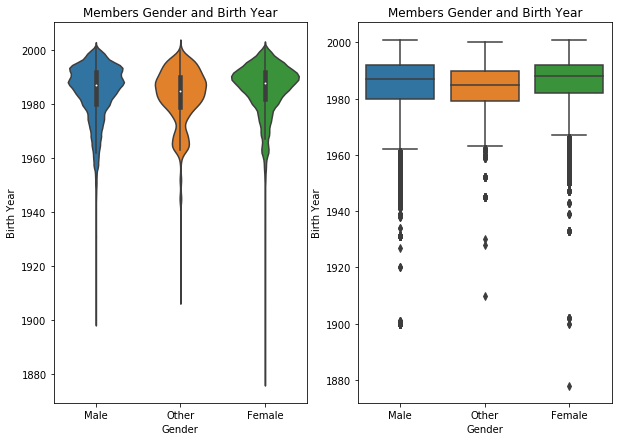

In [23]:
plt.figure(figsize = [10,7])

#Violin Plot with axis names
plt.subplot(1,2,1)
sb.violinplot(data = new_df, x = 'member_gender', y = 'member_birth_year')
plt.title('Members Gender and Birth Year')
plt.xlabel('Gender')
plt.ylabel('Birth Year');

#Box Plot with axis names
plt.subplot(1,2,2)
sb.boxplot(data = new_df, x = 'member_gender', y = 'member_birth_year')
plt.title('Members Gender and Birth Year')
plt.xlabel('Gender')
plt.ylabel('Birth Year');

Looking at the violin plot and box plot above, we can see that the Q1 and Q2 for males and female who rented bikes are the same. However the median, Q3, and Q4 are slighly lower for females and males. And the other option for gender has everythong slightly higher than both males and females who rented bikes. I would also like to mention that there are both genders have many outliers that would need to be investigated.

### What is the min, median, and max duration for bikes that were and weren't shared on a trip?

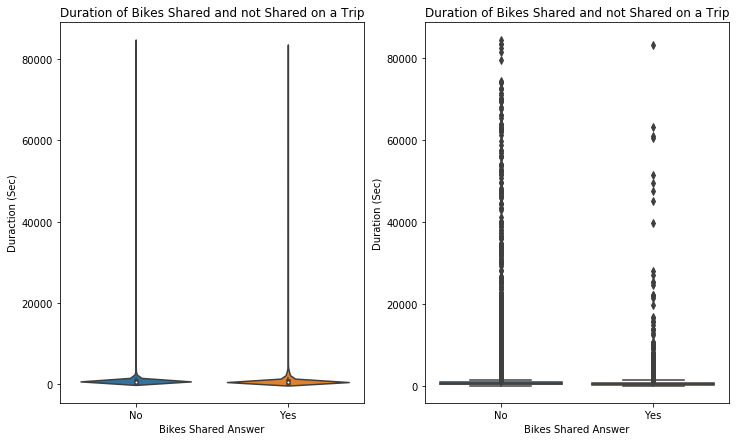

In [24]:
plt.figure(figsize = [12, 7])

#Violin Plot with axis names
plt.subplot(1,2,1)
sb.violinplot(data = new_df, x = 'bike_share_for_all_trip', y = 'duration_sec')
plt.title('Duration of Bikes Shared and not Shared on a Trip')
plt.xlabel('Bikes Shared Answer')
plt.ylabel('Duraction (Sec)');

#Box Plot with axis names
plt.subplot(1,2,2)
sb.boxplot(data = new_df, x = 'bike_share_for_all_trip', y = 'duration_sec')
plt.title('Duration of Bikes Shared and not Shared on a Trip')
plt.xlabel('Bikes Shared Answer')
plt.ylabel('Duration (Sec)');

Looking at the above plots, the information is very close to zero. To make the most out of this visualization and to answer this question, I see that 75% of the data is 800 or lower. SO, I will write a query for any bike rides less than 1000 seconds to get a better observation.

In [25]:
new_duration = new_df.query('duration_sec <= 1000')

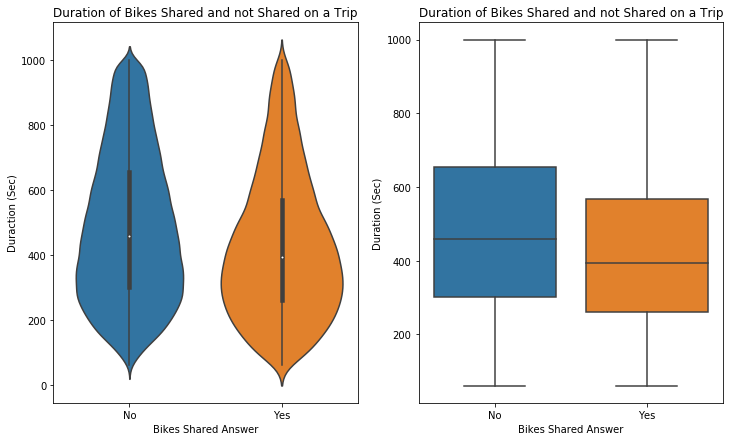

In [26]:
plt.figure(figsize = [12, 7])

#Violin Plot with axis names
plt.subplot(1,2,1)
sb.violinplot(data = new_df, x = 'bike_share_for_all_trip', y = new_duration['duration_sec'])
plt.title('Duration of Bikes Shared and not Shared on a Trip')
plt.xlabel('Bikes Shared Answer')
plt.ylabel('Duraction (Sec)');

#Box Plot with axis names
plt.subplot(1,2,2)
sb.boxplot(data = new_df, x = 'bike_share_for_all_trip', y = new_duration['duration_sec'])
plt.title('Duration of Bikes Shared and not Shared on a Trip')
plt.xlabel('Bikes Shared Answer')
plt.ylabel('Duration (Sec)');

New, I can see that the bikes that were not shared for the whole trip tends to be longer in duration than the bikes that were shared for the whole trip. 

We can also see that the min: 0, Q1: about 350 seconds, median: about 475 seconds, Q3: about 650 seconds, and max: 1000 seconds for bikes that were not shared for the trip based on a query.

We can also see that the min: 0, Q1: about 300 seconds, median: about 400 seconds, Q3: about 580 seconds, and max: 1000 seconds for bikes that were not shared for the trip based on a query.

But just to keep in mind, the when all of the data is used, including the outliers, the results may change.

### What amount of subscribers and customers are male and female?

''

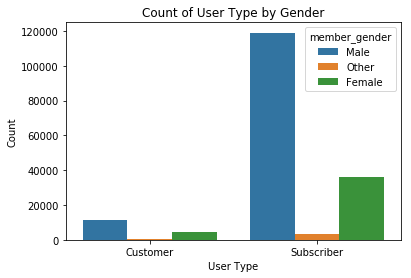

In [27]:
#Clustered bar plot
sb.countplot(data = new_df, x = 'user_type', hue = 'member_gender')
plt.title('Count of User Type by Gender')
plt.xlabel('User Type')
plt.ylabel('Count')
;

The clustered bar chart shows that the 120,000 of subscribers are male, 50,000 subscribers are female, and about 40,000 are other. Also, about 10,000 customers are male and about 2,500 customers are other.

With the pie charts above we can see that majority of the people who rent bikes from Ford GoBike System are males. But, with this clustered bar chart we can break it down further and compare the subscribers and customers from their genders in one visualization.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this section, I was focused on seeing hte relationships between the member's characteristics and other variables. The relationship that I found most interesting was no relationship betwwen the member's birth year and duration of the bike rental. Another relationship investigated was member's gender vs their birth year. This was interesting beacuse no matter the gender, the min and mean were quite similar.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship that I found most interesting was no relationship betwwen the member's birth year and duration of the bike rental. I found this relationship intersting because I qould assume that the yournger you are the more time you would ride a rental bike. However, looking at the scatterplot above, we can see that there are more plots with higher duration time for younger members. But the majority of hte plots are in the lower duration range no matter the member's birth year.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### What is the relationship betwween, a member's gender and birth year, and the duration of hte bike rental?

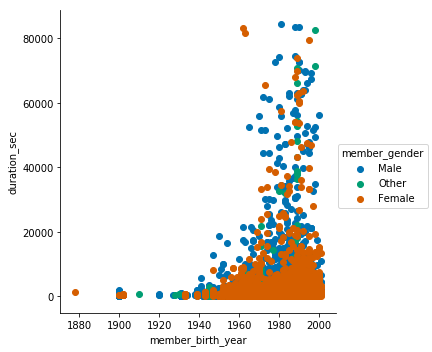

In [28]:
g = sb.FacetGrid(data = new_df, hue = 'member_gender', size = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'member_birth_year', 'duration_sec')
g.add_legend();

This multivariate visualization above we can see that the majority of the males, females, and other members rent the bike for 20,000 seconds or less. But, we can see a few plots of male, females, and other members have rented for 40,000 seconds or more.

### Look into each gender of the members bike rental duration individually.

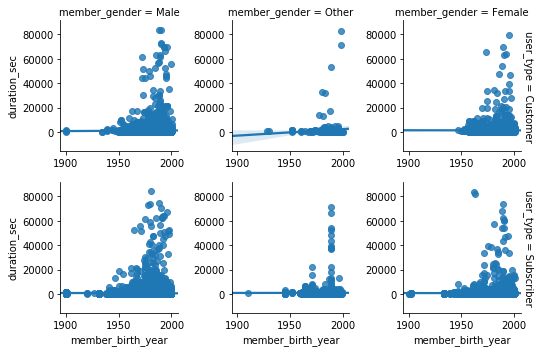

In [29]:
g = sb.FacetGrid(data = df, col = 'member_gender', row = 'user_type', size = 2.5,
                margin_titles = True)
g.map(sb.regplot, 'member_birth_year', 'duration_sec');

Again, we can see that males have the most plots in the scatterplots above. But, we can see that all of these scatterplots that there is no relationship between member birth year and duration for members renting bikes.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The major relationships that were being investigated in this section was member_gender, duration_sec, and member_birth_year. I liked using the facet grid for a scatter plot in this section. You can clearly see the relationships instead of having one scatterplot with oll of the information in it.

### Were there any interesting or surprising interactions between features?

> What I found interesting was that all of the member_birth_year and duration based on gender and user_type, non of then have a relationship. It seem like no matter the age, majority of the members use a bike for 1000 seconds or less.

## Conclusions
> Some of the main findings in this dataset is that there are Market Street is the most popular station for members to start at. Then San Francisco Caltrain Station 2 (Townsend St as 4th St) is the most popular station for mebers to end their bike ride.

> Another intersting finding was that majority of the members are customers and not subscribers. Also, majority of the members were male.

> The last major key finding was that there is no relationships between the member's birth year and duration. Interstingly there was no relationship when broken down further between duration and member's birth year based on the member's gender and user type.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

